In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("data.csv")

In [53]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [54]:
# The dataframe with our features only (picked 13 columns out of 15) to draw the heatmap
features_df = df.drop('Unnamed: 0', axis=1)
features_df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Data Visualization

<Axes: >

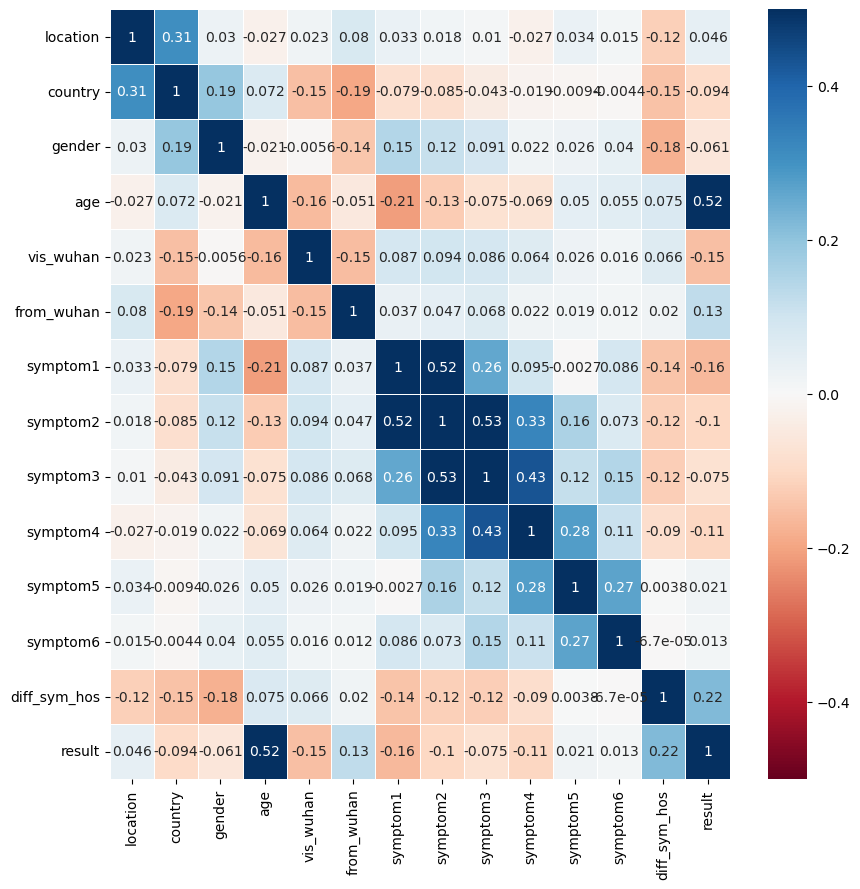

In [55]:
corrmatrix = features_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmatrix, cmap='RdBu', vmin=-0.5, vmax=0.5, linewidths=0.5, annot=True, ax= ax)

<function matplotlib.pyplot.show(close=None, block=None)>

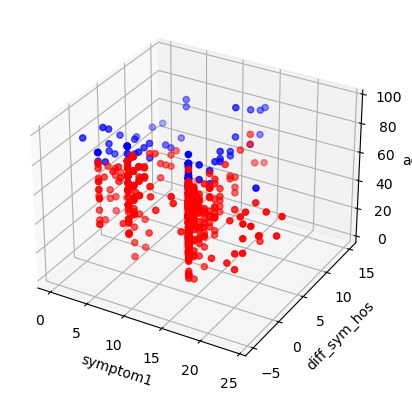

In [56]:
df.head()
real_df= df.drop('Unnamed: 0', axis=1)

class1_df = real_df[real_df["result"] == 0]
class2_df = real_df[real_df["result"] == 1]

# plotting a 4d scatter plot where the 4th dimension is represented with a different color, red = death
# blue = no death, 3d are: symptom3, country, age because of their strong correlation (check the heatmap)
fig1 = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig1.add_subplot(projection='3d') 
ax1.set_xlabel("symptom1")
ax1.set_ylabel("diff_sym_hos")
ax1.set_zlabel("age")
ax1.scatter3D(class1_df["symptom1"], class1_df["diff_sym_hos"], class1_df["age"], color="red")
ax1.scatter3D(class2_df["symptom1"], class2_df["diff_sym_hos"], class2_df["age"], color="blue")
plt.show

# Split our data into train, validate and test

In [57]:
x = df.iloc[:, 1:14].values
y = df.iloc[:, -1].values

# split our data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)
# split our data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.30, random_state=200)

# SVM Model

In [58]:
svm_classifier = svm.SVC(kernel='rbf', gamma=0.0001, C=1, probability=True)
# fitting the model with our train data
svm_classifier.fit(x_train, y_train)

SVC(C=1, gamma=0.0001, probability=True)

SVM classifier Pre-Optimization results:
Accuracy: 0.9435897435897436
Precision: 1.0
F1 score: 0.56
Recall: 0.3888888888888889
ROC score: 0.6944444444444444
 
SVM Testing 1 results:
Accuracy: 0.9166666666666666
Precision: 0.8666666666666667
F1 score: 0.5909090909090909
Recall: 0.4482758620689655
ROC score: 0.718790337451595
----------------------------------------------------------


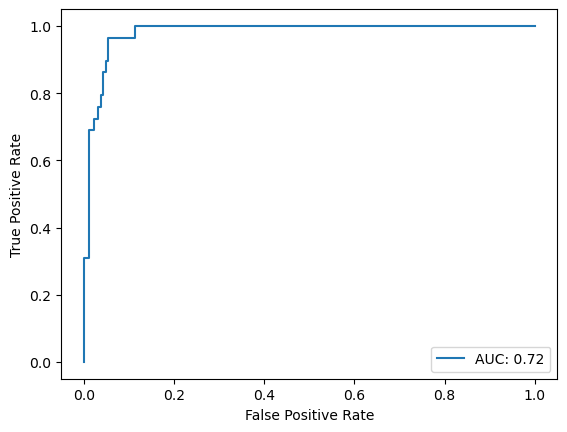

In [59]:
y_pred_svm = svm_classifier.predict(x_val)
print("SVM classifier Pre-Optimization results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred_svm))
print("Precision:", metrics.precision_score(y_val , y_pred_svm))
print("F1 score:",metrics.f1_score(y_val , y_pred_svm))
print("Recall:", metrics.recall_score(y_val , y_pred_svm))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred_svm))


y_pred_svm2 = svm_classifier.predict(x_test)
print(" ")
print("SVM Testing 1 results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_svm2))
print("Precision:", metrics.precision_score(y_test , y_pred_svm2))
print("F1 score:",metrics.f1_score(y_test , y_pred_svm2))
print("Recall:", metrics.recall_score(y_test , y_pred_svm2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_svm2))
print("----------------------------------------------------------")

y_pred_proba_svm = svm_classifier.predict_proba(x_test)[::, 1]
fpr_svm, tpr_svm, _svm = metrics.roc_curve(y_test, y_pred_proba_svm)

# ROC Curve
plt.plot(fpr_svm, tpr_svm, label="AUC: " + str(round(metrics.roc_auc_score(y_test,y_pred_svm2),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVM Hyperparameters tuning

In [60]:
grid_params_svm = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']} 
  
grid = GridSearchCV(svm.SVC(), grid_params_svm, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.934 total time=   1.7s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.922 total time=   1.5s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.956 total time=   0.6s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.956 total time=   3.7s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.912 total time=   2.6s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.934 total time=   3.2s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.922 total time=   2.2s
[CV 4/5] END ..C=10, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [61]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


### Applying Optimal hyperparameters

SVM Post-Optimization classifier results:
Accuracy: 0.9487179487179487
Precision: 0.7857142857142857
F1 score: 0.6875000000000001
Recall: 0.6111111111111112
ROC score: 0.7970809792843692

SVM Testing 2 results:
Accuracy: 0.9583333333333334
Precision: 0.9545454545454546
F1 score: 0.823529411764706
Recall: 0.7241379310344828
ROC score: 0.8593951687257975
----------------------------------------------------------


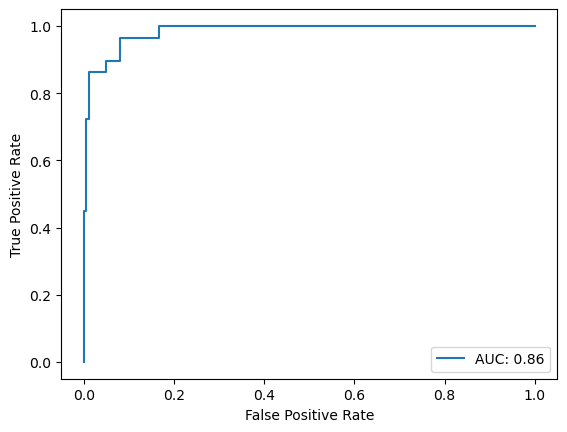

In [62]:
svm_classifier_2 = svm.SVC(kernel='linear', gamma=1, C=1, probability=True)

# fitting the model with our train data
svm_classifier_2.fit(x_train, y_train)

y_pred_svm3 = svm_classifier_2.predict(x_val)
print("SVM Post-Optimization classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred_svm3))
print("Precision:", metrics.precision_score(y_val , y_pred_svm3))
print("F1 score:",metrics.f1_score(y_val , y_pred_svm3))
print("Recall:", metrics.recall_score(y_val , y_pred_svm3))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred_svm3))

print("")
y_pred_svm4 = svm_classifier_2.predict(x_test)
print("SVM Testing 2 results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_svm4))
print("Precision:", metrics.precision_score(y_test , y_pred_svm4))
print("F1 score:",metrics.f1_score(y_test , y_pred_svm4))
print("Recall:", metrics.recall_score(y_test , y_pred_svm4))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_svm4))
print("----------------------------------------------------------")

y_pred_proba_svm2 = svm_classifier_2.predict_proba(x_test)[::, 1]
fpr_svm2, tpr_svm2, _svm2 = metrics.roc_curve(y_test,y_pred_proba_svm2)
plt.plot(fpr_svm2, tpr_svm2, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred_svm4),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


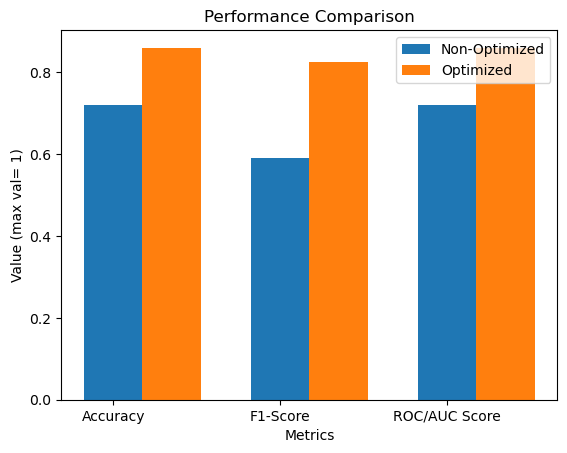

In [63]:
initACC_svm =  metrics.roc_auc_score(y_test, y_pred_svm2)
finalACC_svm = metrics.roc_auc_score(y_test, y_pred_svm4)

initF1_svm =  metrics.f1_score(y_test, y_pred_svm2)
finalF1_svm = metrics.f1_score(y_test, y_pred_svm4)

initROC_svm = metrics.roc_auc_score(y_test, y_pred_svm2)
finalROC_svm = metrics.roc_auc_score(y_test, y_pred_svm4)

data1_svm = np.array([finalACC_svm, finalF1_svm, finalROC_svm])
data2_svm = np.array([initACC_svm,initF1_svm, initROC_svm])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1_svm)), data2_svm, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2_svm)) + bar_width, data1_svm, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1_svm)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

# KNN Model

KNN Pre-Optimization classifier results:
Accuracy: 0.9384615384615385
Precision: 1.0
F1 score: 0.5
Recall: 0.3333333333333333
ROC score: 0.6666666666666666
 
Testing 1:
Accuracy: 0.9490740740740741
Precision: 1.0
F1 score: 0.7659574468085107
Recall: 0.6206896551724138
ROC score: 0.8103448275862069
------------------------------------------------------------------------------


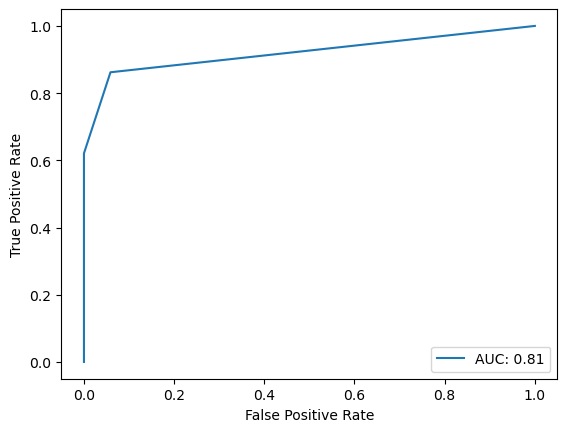

In [64]:
# Our KNN classifier
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)

# Validation
print("KNN Pre-Optimization classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))
print("Precision:", metrics.precision_score(y_val, y_pred))
print("F1 score:", metrics.f1_score(y_val, y_pred))
print("Recall:", metrics.recall_score(y_val, y_pred))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred))

# Testing Before hyperparameters optimization
y_pred2 = knn.predict(x_test)


print(" ")
print("Testing 1:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))
print("Precision:", metrics.precision_score(y_test, y_pred2))
print("F1 score:", metrics.f1_score(y_test, y_pred2))
print("Recall:", metrics.recall_score(y_test, y_pred2))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred2))
print("------------------------------------------------------------------------------")


# ROC/AUC Curves

y_pred_proba = knn.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)


plt.plot(fpr, tpr, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameters tunning

In [65]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best using %s" % (grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.912882 (0.040645) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.912882 (0.040645) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.929147 (0.032126) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.930612 (0.031814) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.912963 (0.029198) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.923285 (0.025515) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.904847 (0.032549) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.915169 (0.029873) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.901884 (0.031747) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.907746 (0.029994) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.912254 (0.031030)

### Applying the optimal hyperparameters 

KNN Post-Optimization classifier results:
Accuracy: 0.958974358974359
Precision: 0.8571428571428571
F1 score: 0.75
Recall: 0.6666666666666666
ROC score: 0.827683615819209
 
Testing 2:
Accuracy: 0.9398148148148148
Precision: 0.7666666666666667
F1 score: 0.7796610169491527
Recall: 0.7931034482758621
ROC score: 0.877835146597824
-----------------------------------------------------------------------------------


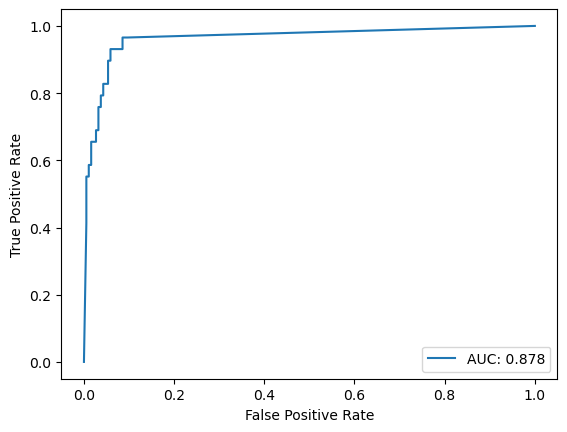

In [66]:
knn2 = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
knn2.fit(x_train, y_train)
y_pred3 = knn2.predict(x_val)

print("KNN Post-Optimization classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred3))
print("Precision:", metrics.precision_score(y_val, y_pred3))
print("F1 score:", metrics.f1_score(y_val, y_pred3))
print("Recall:", metrics.recall_score(y_val, y_pred3))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred3))

# Testing
y_pred4 = knn2.predict(x_test)

print(" ")
print("Testing 2:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))
print("Precision:", metrics.precision_score(y_test, y_pred4))
print("F1 score:", metrics.f1_score(y_test, y_pred4))
print("Recall:", metrics.recall_score(y_test, y_pred4))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred4))
print("-----------------------------------------------------------------------------------")

y_pred_proba2 = knn2.predict_proba(x_test)[::, 1]
fpr2, tpr2, _2 = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr2, tpr2, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred4),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Performance Comparison

#### Better ROC/AUC curves tend to move to the upper left corner of the axis 

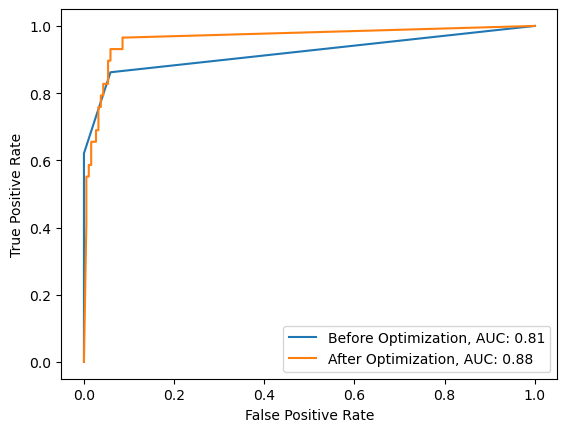

In [67]:
plt.plot(fpr, tpr, label="Before Optimization, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),2)))
plt.plot(fpr2, tpr2, label="After Optimization, AUC: " +str(round(metrics.roc_auc_score(y_test, y_pred4),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Accuracy Change

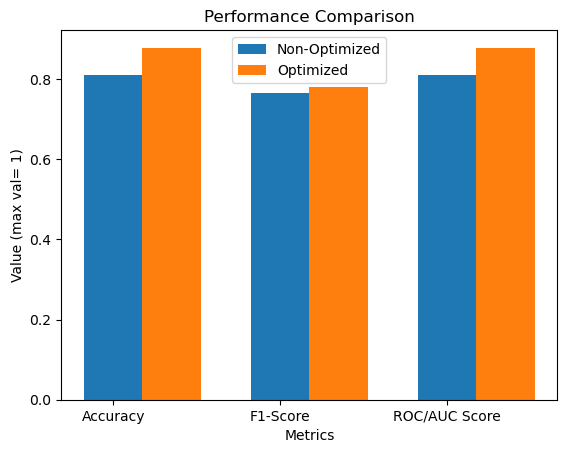

In [68]:
initACC =  metrics.roc_auc_score(y_test, y_pred2)
finalACC = metrics.roc_auc_score(y_test, y_pred4)

initF1 =  metrics.f1_score(y_test, y_pred2)
finalF1 = metrics.f1_score(y_test, y_pred4)

initROC = metrics.roc_auc_score(y_test, y_pred2)
finalROC = metrics.roc_auc_score(y_test, y_pred4)

data1 = np.array([finalACC, finalF1, finalROC])
data2 = np.array([initACC,initF1, initROC])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data2, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data1, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

# Bayes Classifier

Bayes classifier Pre-Optimization results:
Accuracy: 0.882051282051282
Precision: 0.35294117647058826
F1 score: 0.34285714285714286
Recall: 0.3333333333333333
ROC score: 0.635593220338983

BC Testing 1:
Accuracy: 0.8333333333333334
Precision: 0.36
F1 score: 0.3333333333333333
Recall: 0.3103448275862069
ROC score: 0.6123916651300019
-------------------------------------------------------------


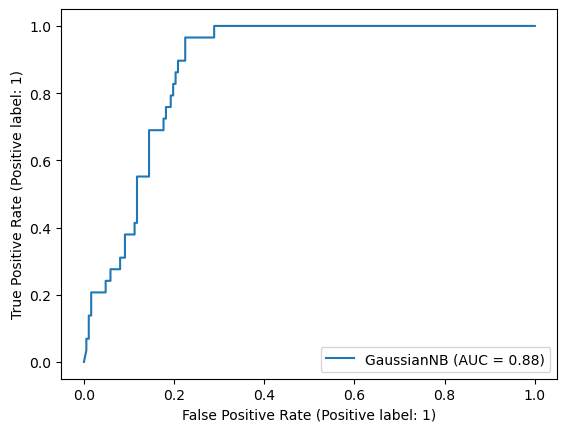

In [69]:
gnb_classifier = GaussianNB(var_smoothing=0.0001)
gnb_classifier.fit(x_train, y_train)
y_pred_bayes = gnb_classifier.predict(x_val)

print("Bayes classifier Pre-Optimization results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred_bayes))
print("Precision:", metrics.precision_score(y_val , y_pred_bayes))
print("F1 score:",metrics.f1_score(y_val , y_pred_bayes))
print("Recall:", metrics.recall_score(y_val , y_pred_bayes))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred_bayes))

print("")
y_pred_bayes2 = gnb_classifier.predict(x_test)
print("BC Testing 1:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_bayes2))
print("Precision:", metrics.precision_score(y_test , y_pred_bayes2))
print("F1 score:",metrics.f1_score(y_test , y_pred_bayes2))
print("Recall:", metrics.recall_score(y_test , y_pred_bayes2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_bayes2))
print('-------------------------------------------------------------')

svc_disp = RocCurveDisplay.from_estimator(gnb_classifier, x_test, y_test)

## Hyperparameters tunning

In [70]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.01873817422860384)


Bayes classifier Post-Optimization results:
Accuracy: 0.9282051282051282
Precision: 0.75
F1 score: 0.46153846153846156
Recall: 0.3333333333333333
ROC score: 0.6610169491525424

BC Testing 2:
Accuracy: 0.9027777777777778
Precision: 0.75
F1 score: 0.5333333333333333
Recall: 0.41379310344827586
ROC score: 0.6962013645583626
-------------------------------------------------------------


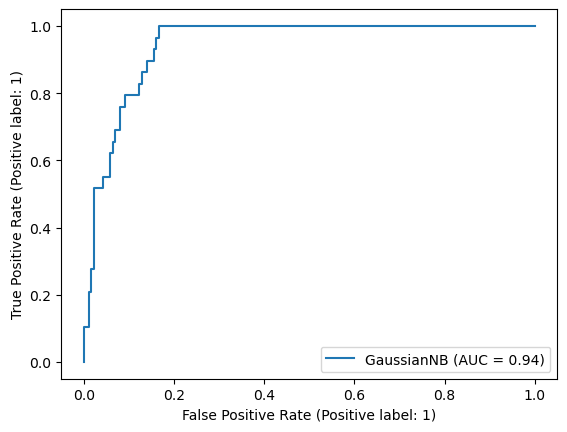

In [71]:
gnb_classifier2 = GaussianNB(var_smoothing=0.01873817422860384)
gnb_classifier2.fit(x_train, y_train)
y_pred_bayes3 = gnb_classifier2.predict(x_val)

print("Bayes classifier Post-Optimization results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred_bayes3))
print("Precision:", metrics.precision_score(y_val , y_pred_bayes3))
print("F1 score:",metrics.f1_score(y_val , y_pred_bayes3))
print("Recall:", metrics.recall_score(y_val , y_pred_bayes3))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred_bayes3))

print("")
y_pred_bayes4 = gnb_classifier2.predict(x_test)
print("BC Testing 2:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_bayes4))
print("Precision:", metrics.precision_score(y_test , y_pred_bayes4))
print("F1 score:",metrics.f1_score(y_test , y_pred_bayes4))
print("Recall:", metrics.recall_score(y_test , y_pred_bayes4))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_bayes4))
print('-------------------------------------------------------------')

svc_disp = RocCurveDisplay.from_estimator(gnb_classifier2, x_test, y_test)

## Performance Comparison

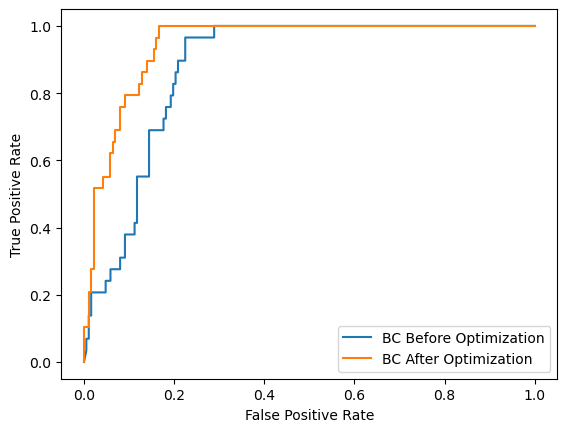

In [72]:
y_pred_proba_bayes = gnb_classifier.predict_proba(x_test)[::, 1]
fpr_bayes, tpr_bayes, _bayes = metrics.roc_curve(y_test, y_pred_proba_bayes)

y_pred_proba_bayes2 = gnb_classifier2.predict_proba(x_test)[::, 1]
fpr_bayes2, tpr_bayes2, _bayes2 = metrics.roc_curve(y_test, y_pred_proba_bayes2)

plt.plot(fpr_bayes, tpr_bayes, label="BC Before Optimization") 
plt.plot(fpr_bayes2, tpr_bayes2, label="BC After Optimization")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

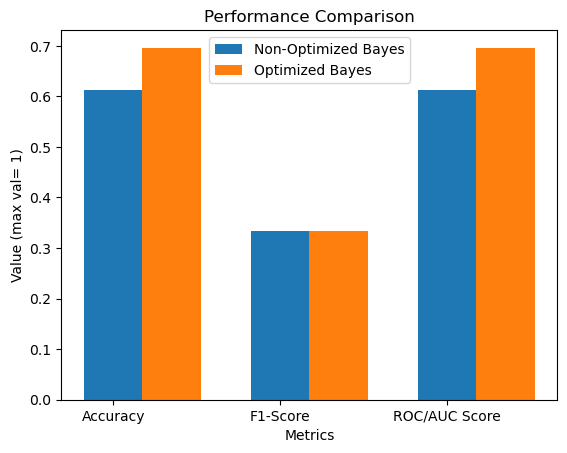

In [73]:
initACC_bayes =  metrics.roc_auc_score(y_test, y_pred_bayes2)
finalACC_bayes = metrics.roc_auc_score(y_test, y_pred_bayes4)

initF1_bayes =  metrics.f1_score(y_test, y_pred_bayes2)
finalF1_bayes = metrics.f1_score(y_test, y_pred_bayes2)

initROC_bayes = metrics.roc_auc_score(y_test, y_pred_bayes2)
finalROC_bayes = metrics.roc_auc_score(y_test, y_pred_bayes4)

data1_bayes = np.array([finalACC_bayes, finalF1_bayes, finalROC_bayes])
data2_bayes = np.array([initACC_bayes,initF1_bayes, initROC_bayes])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1_bayes)), data2_bayes, bar_width, label='Non-Optimized Bayes')

# Plot the second set of bars
ax.bar(np.arange(len(data2_bayes)) + bar_width, data1_bayes, bar_width, label='Optimized Bayes')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1_bayes)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

# Decision Tree

In [74]:
DTclassifier= DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=13,
                       random_state=200)
DTclassifier.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=10, min_samples_leaf=13, random_state=200)

## Cross Validation

In [75]:
cv_scores = cross_val_score(DTclassifier, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.93063584 0.83236994 0.91907514 0.9244186  0.95348837]
Mean CV Score: 0.9119975803199354


Decision tree Pre-Optimization classifier results:
Accuracy: 0.9641025641025641
Precision: 0.8666666666666667
F1 score: 0.7878787878787877
Recall: 0.7222222222222222
ROC score: 0.8554613935969869
 
Testing 1:
Accuracy: 0.9490740740740741
Precision: 0.8461538461538461
F1 score: 0.8
Recall: 0.7586206896551724
ROC score: 0.8686151576618109
------------------------------------------------------------------------------


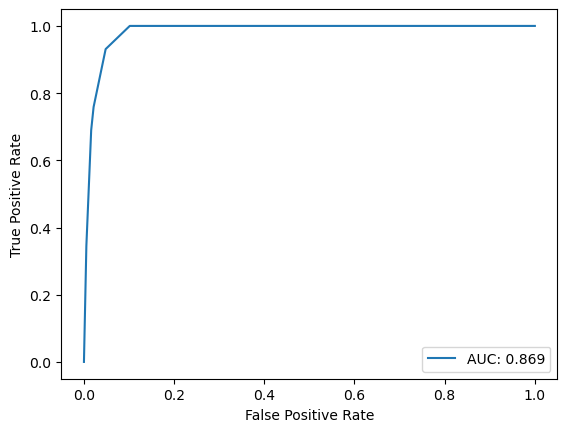

In [76]:
y_pred_dt = DTclassifier.predict(x_val)
print("Decision tree Pre-Optimization classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_dt))
print("Precision:", metrics.precision_score(y_val, y_pred_dt))
print("F1 score:", metrics.f1_score(y_val, y_pred_dt))
print("Recall:", metrics.recall_score(y_val, y_pred_dt))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred_dt))

# Testing Before hyperparameters optimization
y_pred_dt2 = DTclassifier.predict(x_test)


print(" ")
print("Testing 1:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dt2))
print("Precision:", metrics.precision_score(y_test, y_pred_dt2))
print("F1 score:", metrics.f1_score(y_test, y_pred_dt2))
print("Recall:", metrics.recall_score(y_test, y_pred_dt2))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred_dt2))
print("------------------------------------------------------------------------------")


# ROC/AUC Curves

y_pred_proba_dt = DTclassifier.predict_proba(x_test)[::, 1]
fpr_dt, tpr_dt, _dt = metrics.roc_curve(y_test, y_pred_proba_dt)


plt.plot(fpr_dt, tpr_dt, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred_dt2),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameters Tunning

In [77]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=DTclassifier, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=13,
                                              random_state=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [78]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=200)

Decision Tree classifier Post-Optimization results:
Accuracy: 0.9538461538461539
Precision: 0.7647058823529411
F1 score: 0.7428571428571428
Recall: 0.7222222222222222
ROC score: 0.8498116760828626

Decision Tree Testing 2:
Accuracy: 0.9629629629629629
Precision: 0.8620689655172413
F1 score: 0.8620689655172413
Recall: 0.8620689655172413
ROC score: 0.9203392955928453
-------------------------------------------------------------


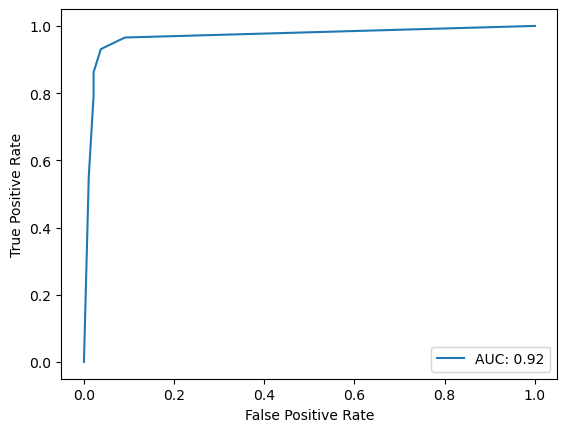

In [79]:
DTclassifier2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=200)
DTclassifier2.fit(x_train, y_train)
y_pred_dt3 = DTclassifier2.predict(x_val)

print("Decision Tree classifier Post-Optimization results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred_dt3))
print("Precision:", metrics.precision_score(y_val , y_pred_dt3))
print("F1 score:",metrics.f1_score(y_val , y_pred_dt3))
print("Recall:", metrics.recall_score(y_val , y_pred_dt3))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred_dt3))

print("")
y_pred_dt4 = DTclassifier2.predict(x_test)
print("Decision Tree Testing 2:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred_dt4))
print("Precision:", metrics.precision_score(y_test , y_pred_dt4))
print("F1 score:",metrics.f1_score(y_test , y_pred_dt4))
print("Recall:", metrics.recall_score(y_test , y_pred_dt4))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_dt4))
print('-------------------------------------------------------------')

y_pred_proba_dt2 = DTclassifier2.predict_proba(x_test)[::, 1]
fpr_dt2, tpr_dt2, _dt2 = metrics.roc_curve(y_test, y_pred_proba_dt2)
plt.plot(fpr_dt2, tpr_dt2, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred_dt4),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Performance Comparison

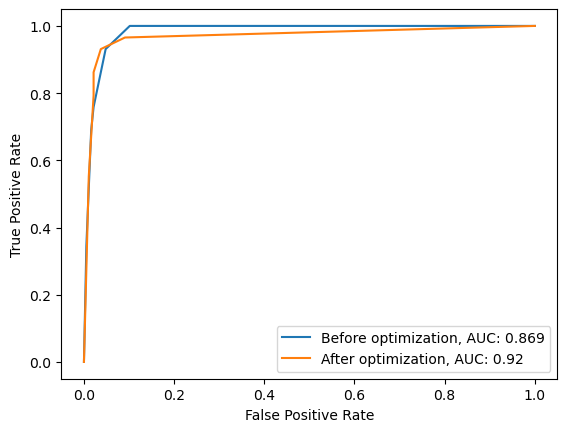

In [80]:
plt.plot(fpr_dt, tpr_dt, label="Before optimization, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred_dt2),3)))
plt.plot(fpr_dt2, tpr_dt2, label="After optimization, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred_dt4),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

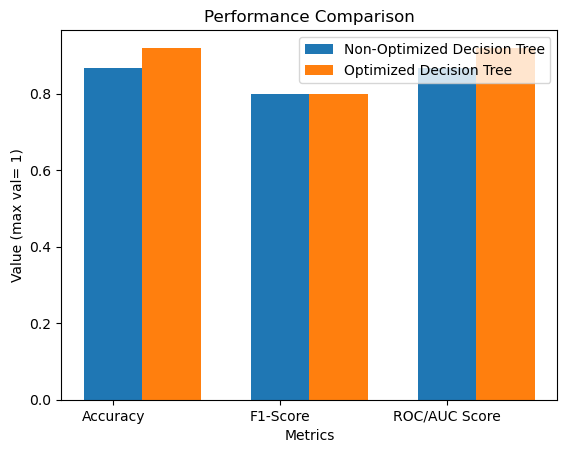

In [81]:
initACC_dt =  metrics.roc_auc_score(y_test, y_pred_dt2)
finalACC_dt = metrics.roc_auc_score(y_test, y_pred_dt4)

initF1_dt =  metrics.f1_score(y_test, y_pred_dt2)
finalF1_dt = metrics.f1_score(y_test, y_pred_dt2)

initROC_dt = metrics.roc_auc_score(y_test, y_pred_dt2)
finalROC_dt = metrics.roc_auc_score(y_test, y_pred_dt4)

data1_dt = np.array([finalACC_dt, finalF1_dt, finalROC_dt])
data2_dt = np.array([initACC_dt,initF1_dt, initROC_dt])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1_dt)), data2_dt, bar_width, label='Non-Optimized Decision Tree')

# Plot the second set of bars
ax.bar(np.arange(len(data2_dt)) + bar_width, data1_dt, bar_width, label='Optimized Decision Tree')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1_dt)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

# Muli-Layer perceptron.

# Validation and Testing before hyperparameters Tuning

In [82]:
from sklearn.neural_network import MLPClassifier
# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(90, 90), activation='identity', solver='adam', random_state=42)

# cross-validation

In [83]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores_mlp = cross_val_score(mlp, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores_mlp)
print("Mean CV Score:", cv_scores_mlp.mean())

Cross-Validation Scores: [0.75722543 0.9132948  0.88439306 0.90116279 0.94767442]
Mean CV Score: 0.8807501008200027


In [84]:

mlp.fit(x_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(90, 90),
              random_state=42)

In [85]:
y_pred_mlp = mlp.predict(x_val)

In [86]:
print("Multi-Layer Perceptron Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_mlp))
print("Precision:", metrics.precision_score(y_val, y_pred_mlp))
print("F1 score:", metrics.f1_score(y_val, y_pred_mlp))
print("Recall:", metrics.recall_score(y_val, y_pred_mlp))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred_mlp))

Multi-Layer Perceptron Validation classifier results:
Accuracy: 0.882051282051282
Precision: 0.4
F1 score: 0.46511627906976744
Recall: 0.5555555555555556
ROC score: 0.7354048964218456


In [87]:
y_pred2_mlp = mlp.predict(x_test)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2_mlp))
print("Precision:", metrics.precision_score(y_test, y_pred2_mlp))
print("F1 score:", metrics.f1_score(y_test, y_pred2_mlp))
print("Recall:", metrics.recall_score(y_test, y_pred2_mlp))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred2_mlp))

SVM Validation classifier results:
Accuracy: 0.9074074074074074
Precision: 0.6216216216216216
F1 score: 0.696969696969697
Recall: 0.7931034482758621
ROC score: 0.8591185690577171


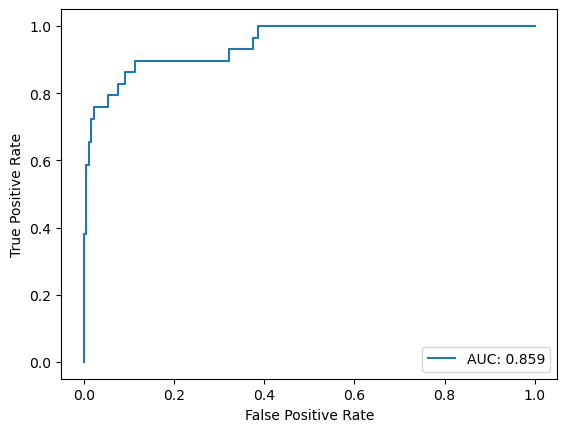

In [88]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba_mlp = mlp.predict_proba(x_test)[::, 1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred_proba_mlp)


plt.plot(fpr_mlp, tpr_mlp, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2_mlp), 3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# MLP Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(90, 90), (100, 100), (110, 100)],
    'activation': ['relu', 'identity'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)

In [90]:
# fitting the model for grid search
grid_mlp.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=(90, 90),
                                     random_state=42),
             param_grid={'activation': ['relu', 'identity'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(90, 90), (100, 100),
                                                (110, 100)],
                         'solver': ['adam', 'sgd']})

In [91]:
# print best parameter after tuning
print(grid_mlp.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_mlp.best_estimator_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (110, 100), 'solver': 'adam'}
MLPClassifier(alpha=0.001, hidden_layer_sizes=(110, 100), random_state=42)


# Testing and Vlidation after hyperparameters Tuning


In [92]:
from sklearn.model_selection import cross_val_score
# Create an MLP classifier
mlp2 = MLPClassifier(hidden_layer_sizes=(110, 100), activation='relu', solver='adam', random_state=42)


# Cross Validation

In [93]:

# Perform cross-validation
cv_scores2_mlp = cross_val_score(mlp2, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores2_mlp)
print("Mean CV Score:", cv_scores2_mlp.mean())

Cross-Validation Scores: [0.9017341  0.87861272 0.97109827 0.97093023 0.96511628]
Mean CV Score: 0.937498319666622


In [94]:
mlp2.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(110, 100), random_state=42)

In [95]:
y_pred3_mlp = mlp2.predict(x_val)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val, y_pred3_mlp))
print("Precision:", metrics.precision_score(y_val, y_pred3_mlp))
print("F1 score:", metrics.f1_score(y_val, y_pred3_mlp))
print("Recall:", metrics.recall_score(y_val, y_pred3_mlp))
print("ROC score:", metrics.roc_auc_score(y_val, y_pred3_mlp))

SVM Validation classifier results:
Accuracy: 0.958974358974359
Precision: 0.8571428571428571
F1 score: 0.75
Recall: 0.6666666666666666
ROC score: 0.827683615819209


In [96]:
y_pred4_mlp = mlp2.predict(x_test)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4_mlp))
print("Precision:", metrics.precision_score(y_test, y_pred4_mlp))
print("F1 score:", metrics.f1_score(y_test, y_pred4_mlp))
print("Recall:", metrics.recall_score(y_test, y_pred4_mlp))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred4_mlp))

SVM Validation classifier results:
Accuracy: 0.9768518518518519
Precision: 1.0
F1 score: 0.9056603773584906
Recall: 0.8275862068965517
ROC score: 0.9137931034482758


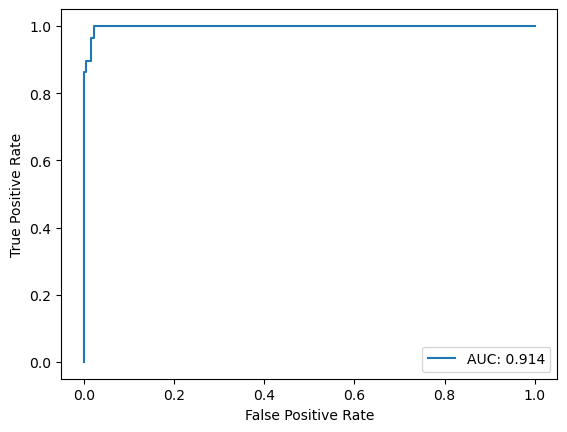

In [97]:
y_pred_proba2_mlp = mlp2.predict_proba(x_test)[::, 1]
fpr2_mlp, tpr2_mlp, _2 = metrics.roc_curve(y_test, y_pred_proba2_mlp)
plt.plot(fpr2_mlp, tpr2_mlp, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred4_mlp),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Performance comparison


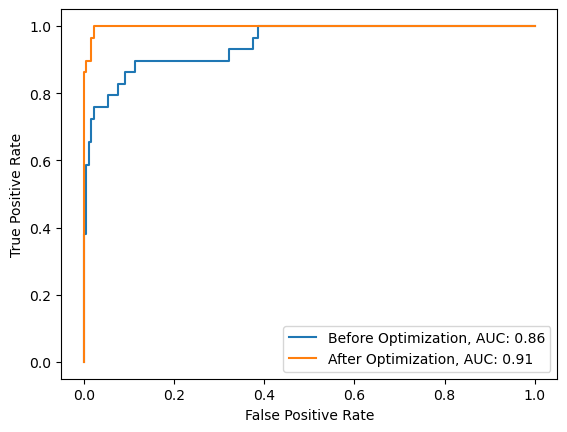

In [98]:
plt.plot(fpr_mlp, tpr_mlp, label="Before Optimization, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2_mlp),2)))
plt.plot(fpr2_mlp, tpr2_mlp, label="After Optimization, AUC: " +str(round(metrics.roc_auc_score(y_test, y_pred4_mlp),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Accuracy change

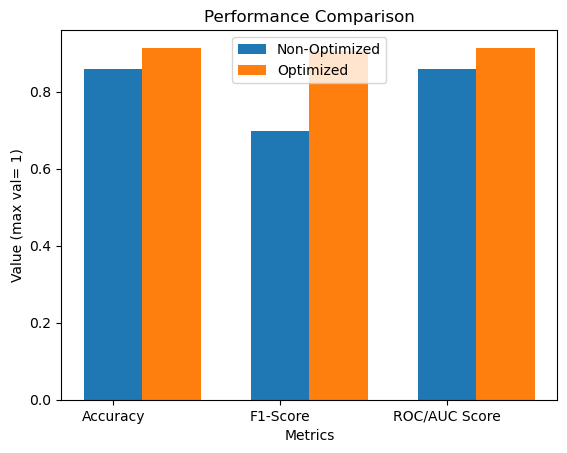

In [99]:
initACC_mlp =  metrics.roc_auc_score(y_test, y_pred2_mlp)
finalACC_mlp = metrics.roc_auc_score(y_test, y_pred4_mlp)

initF1_mlp =  metrics.f1_score(y_test, y_pred2_mlp)
finalF1_mlp = metrics.f1_score(y_test, y_pred4_mlp)

initROC_mlp = metrics.roc_auc_score(y_test, y_pred2_mlp)
finalROC_mlp = metrics.roc_auc_score(y_test, y_pred4_mlp)

data1_mlp = np.array([finalACC_mlp, finalF1_mlp, finalROC_mlp])
data2_mlp = np.array([initACC_mlp, initF1_mlp, initROC_mlp])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data2_mlp, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data1_mlp, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

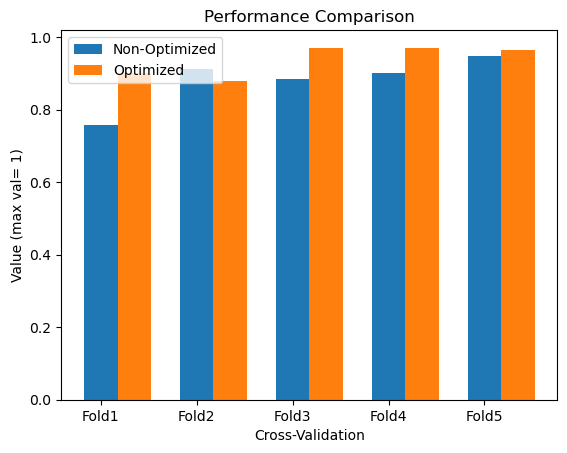

In [100]:
Score1_before_tuning =  cv_scores_mlp[0]
Score1_after_tuning =  cv_scores2_mlp[0]

Score2_before_tuning =  cv_scores_mlp[1]
Score2_after_tuning =  cv_scores2_mlp[1]

Score3_before_tuning =  cv_scores_mlp[2]
Score3_after_tuning =  cv_scores2_mlp[2]

Score4_before_tuning =  cv_scores_mlp[3]
Score4_after_tuning =  cv_scores2_mlp[3]

Score5_before_tuning =  cv_scores_mlp[4]
Score5_after_tuning =  cv_scores2_mlp[4]

data1 = np.array([Score1_before_tuning, Score2_before_tuning, Score3_before_tuning, Score4_before_tuning,Score5_before_tuning])
data2 = np.array([Score1_after_tuning, Score2_after_tuning, Score3_after_tuning, Score4_after_tuning, Score5_after_tuning])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data1, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data2, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Fold1', 'Fold2', 'Fold3','Fold4', 'Fold5'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Cross-Validation')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

# Comparing Performance of all classifiers

## Accuracy, Precision, Recall , F1 score and ROC

print("Accuracy:", metrics.accuracy_score(y_test , y_pred_svm4))
print("Precision:", metrics.precision_score(y_test , y_pred_svm4))
print("F1 score:",metrics.f1_score(y_test , y_pred_svm4))
print("Recall:", metrics.recall_score(y_test , y_pred_svm4))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred_svm4))

In [102]:
print("Accuracy")
accDict = {'SVM':metrics.accuracy_score(y_test , y_pred_svm4), 'KNN':metrics.accuracy_score(y_test , y_pred4), 
           'Bayes':metrics.accuracy_score(y_test , y_pred_bayes4), 
           'Multi-Layer Perceptron': metrics.accuracy_score(y_test , y_pred4_mlp ) }
for key in accDict:
    print(key, accDict[key])
print("")
print("SVM has highest accuracy")

Accuracy
SVM 0.9583333333333334
KNN 0.9398148148148148
Bayes 0.9027777777777778
Multi-Layer Perceptron 0.9768518518518519

SVM has highest accuracy


In [107]:
print("Precision")
percDict = {'SVM':metrics.precision_score(y_test , y_pred_svm4), 'KNN':metrics.precision_score(y_test , y_pred4), 
           'Bayes':metrics.precision_score(y_test , y_pred_bayes4), 
           'Multi-Layer Perceptron': metrics.precision_score(y_test , y_pred4_mlp ) }
for key in percDict:
    print(key, percDict[key])
print("")
print("SVM has highest precision")

Precision
SVM 0.9545454545454546
KNN 0.7666666666666667
Bayes 0.75
Multi-Layer Perceptron 1.0

SVM has highest precision


In [108]:
print("F1")
fDict = {'SVM':metrics.f1_score(y_test , y_pred_svm4), 'KNN':metrics.f1_score(y_test , y_pred4), 
           'Bayes':metrics.f1_score(y_test , y_pred_bayes4), 
           'Multi-Layer Perceptron': metrics.f1_score(y_test , y_pred4_mlp ) }
for key in fDict:
    print(key, fDict[key])
print("")
print("SVM has highest f1 score")

F1
SVM 0.823529411764706
KNN 0.7796610169491527
Bayes 0.5333333333333333
Multi-Layer Perceptron 0.9056603773584906

SVM has highest f1 score


In [110]:
print("Recall")
rDict = {'SVM':metrics.recall_score(y_test , y_pred_svm4), 'KNN':metrics.recall_score(y_test , y_pred4), 
           'Bayes':metrics.recall_score(y_test , y_pred_bayes4), 
           'Multi-Layer Perceptron':metrics.recall_score(y_test , y_pred4_mlp) }
for key in rDict:
    print(key, rDict[key])
print("")
print("KNN has highest Recall")

Recall
SVM 0.7241379310344828
KNN 0.7931034482758621
Bayes 0.41379310344827586
Multi-Layer Perceptron 0.8275862068965517

KNN has highest Recall


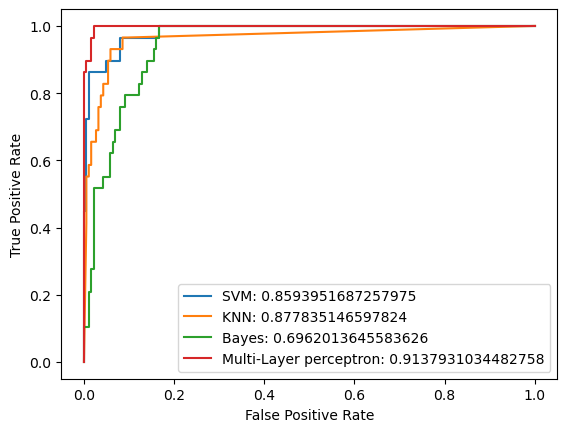

KNN has the best ROC AUC score


In [112]:
plt.plot(fpr_svm2, tpr_svm2, label="SVM: " + str(metrics.roc_auc_score(y_test , y_pred_svm4)))
plt.plot(fpr2, tpr2, label="KNN: "+ str(metrics.roc_auc_score(y_test , y_pred4)))
plt.plot(fpr_bayes2, tpr_bayes2, label="Bayes: "+ str(metrics.roc_auc_score(y_test , y_pred_bayes4)))
plt.plot(fpr2_mlp, tpr2_mlp, label="Multi-Layer perceptron: "+ str(metrics.roc_auc_score(y_test , y_pred4_mlp)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
print("KNN has the best ROC AUC score")